In [1]:
import numpy as np
import copy
from astropy.io import fits
from importlib import reload
import matplotlib.pyplot as plt
plt.rcParams['image.origin']='lower'
import os
from pathlib import Path
from datetime import datetime
date = int(datetime.today().strftime('%Y%m%d'))

import proper
proper.use_ffti = False
proper.use_fftw = False

import roman_phasec_proper as phasec
phasec.copy_here()
import falco

from IPython.display import clear_output, display, HTML
display(HTML("<style>.container { width:90% !important; }</style>")) # just making the notebook cells wider

falco_dir = Path(os.path.dirname(falco.__file__))
roman_dir = Path(os.path.dirname(falco_dir))/'roman'
flatmap_dir = roman_dir/'flatmaps'

import misc
from imshows import *

import falco_hlc_575_mp
import phase_retrieval as pr

/home/u21/kianmilani/Documents/falco-python/falco/config


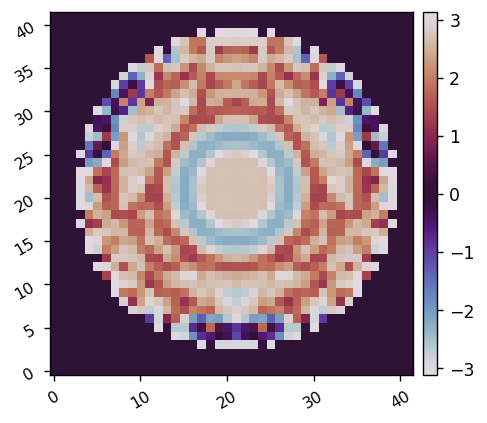

In [4]:
reload(falco_hlc_575_mp)
mp = falco_hlc_575_mp.setup_mp(Nitr=30, estimator='pwp-bp')

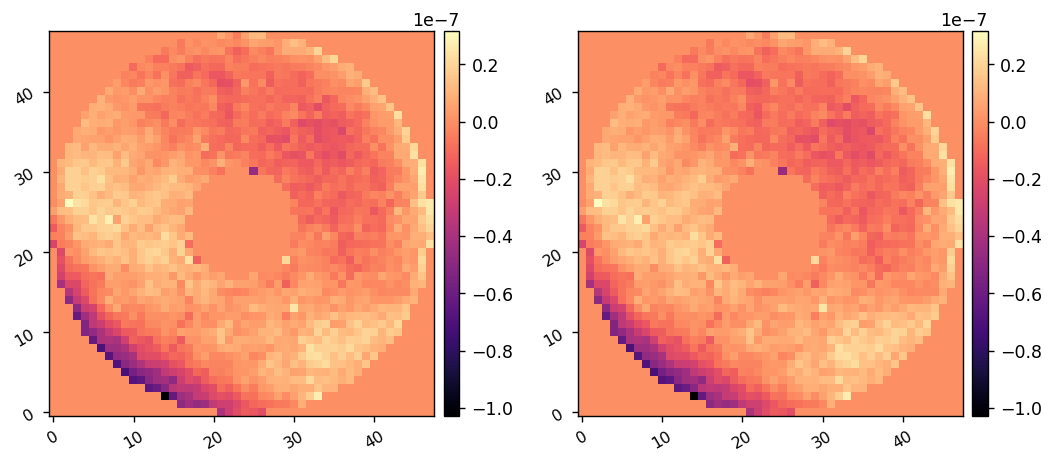

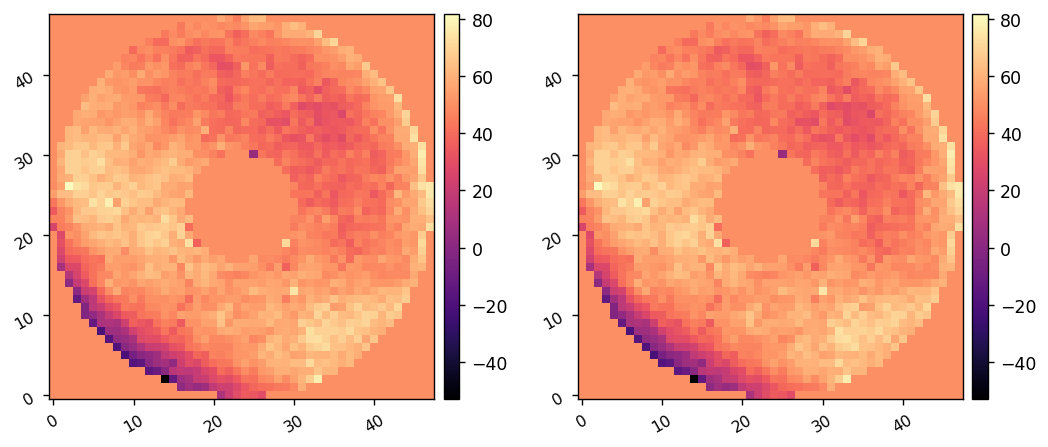

In [3]:
dm1_flat_fpath = Path('~/roman_phasec_v1.4/python/roman_phasec_proper/examples/hlc_flattened_dm1.fits')
dm2_flat_fpath = Path('~/roman_phasec_v1.4/python/roman_phasec_proper/examples/hlc_flattened_dm2.fits')

dm1_flat = fits.getdata(dm1_flat_fpath)
dm2_flat = fits.getdata(dm2_flat_fpath)
imshow2(dm1_flat, dm2_flat)

mp.full.dm1 = falco.config.Object()
mp.full.dm2 = falco.config.Object()

mp.full.dm1.flatmap = dm1_flat
mp.full.dm2.flatmap = dm2_flat

mp.dm1.biasMap = 50 + mp.full.dm1.flatmap/mp.dm1.VtoH  # Bias voltage. Needed prior to WFSC to allow + and - voltages. Total voltage is mp.dm1.biasMap + mp.dm1.V
mp.dm2.biasMap = 50 + mp.full.dm2.flatmap/mp.dm2.VtoH  # Bias voltage. Needed prior to WFSC to allow + and - voltages. Total voltage is mp.dm2.biasMap + mp.dm2.V
imshow2(mp.dm1.biasMap, mp.dm2.biasMap)

In [4]:
# DM starting voltages (in the PROPER model only)
# fn_dm1_design = os.path.join(str(flatmap_dir), 'dm1_m_design_hlc_band1.fits')
# fn_dm2_design = os.path.join(str(flatmap_dir), 'dm2_m_design_hlc_band1.fits')
# fn_dm1_flatmap = os.path.join(str(flatmap_dir), 'dm1_m_flat_hlc_band1.fits')
# fn_dm2_flatmap = os.path.join(str(flatmap_dir), 'dm2_m_flat_hlc_band1.fits')


# mp.full.dm1 = falco.config.Object()
# mp.full.dm2 = falco.config.Object()

# dm1_hlc_flatmap = fits.getdata(fn_dm1_flatmap)
# dm2_hlc_flatmap = fits.getdata(fn_dm2_flatmap)
# imshow2(dm1_hlc_flatmap, dm2_hlc_flatmap)

# dm1_hlc_design = fits.getdata(fn_dm1_design)
# dm2_hlc_design = fits.getdata(fn_dm2_design)
# imshow2(dm1_hlc_design, dm2_hlc_design)

# # mp.full.dm1.flatmap = dm1_hlc_flatmap + dm1_hlc_design
# # mp.full.dm2.flatmap = dm2_hlc_flatmap + dm2_hlc_design

# mp.full.dm1.flatmap = dm1_flat
# mp.full.dm2.flatmap = dm2_flat

# mp.dm1.biasMap = 50 + mp.full.dm1.flatmap/mp.dm1.VtoH  # Bias voltage. Needed prior to WFSC to allow + and - voltages. Total voltage is mp.dm1.biasMap + mp.dm1.V
# mp.dm2.biasMap = 50 + mp.full.dm2.flatmap/mp.dm2.VtoH  # Bias voltage. Needed prior to WFSC to allow + and - voltages. Total voltage is mp.dm2.biasMap + mp.dm2.V
# imshow2(mp.dm1.biasMap, mp.dm2.biasMap)


# Run idealized phase retrieval to make an accurate compact model

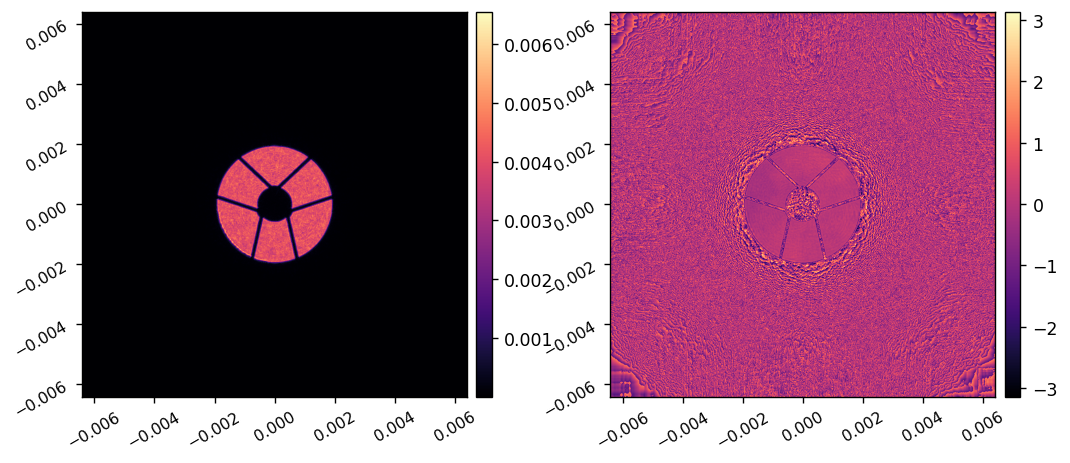

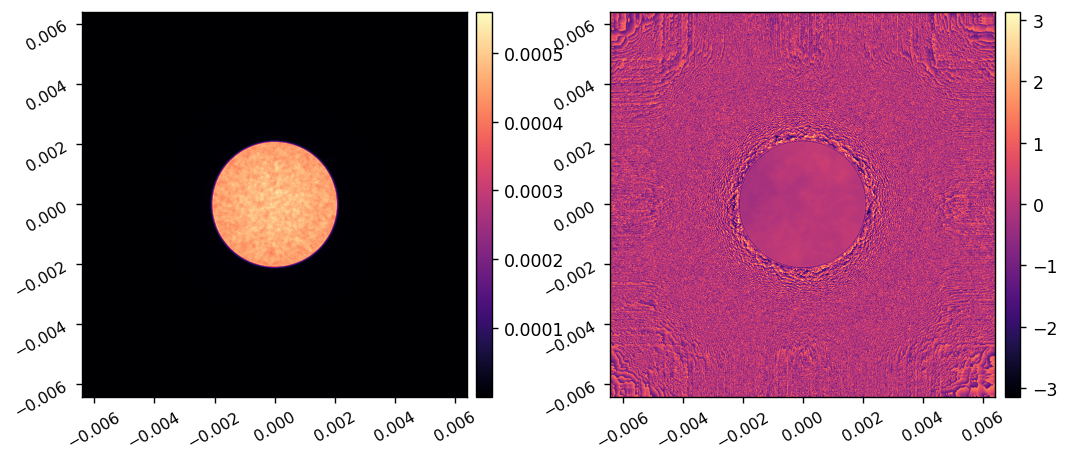

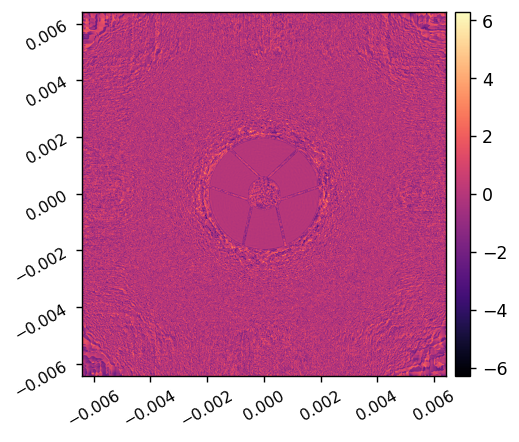

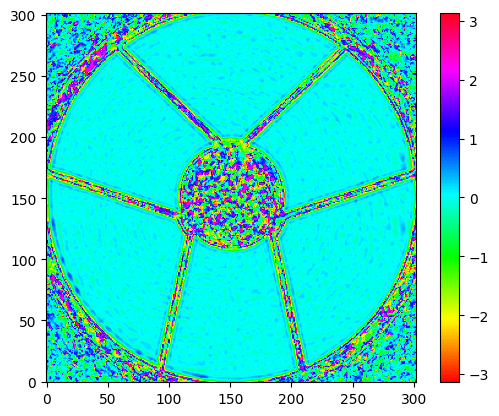

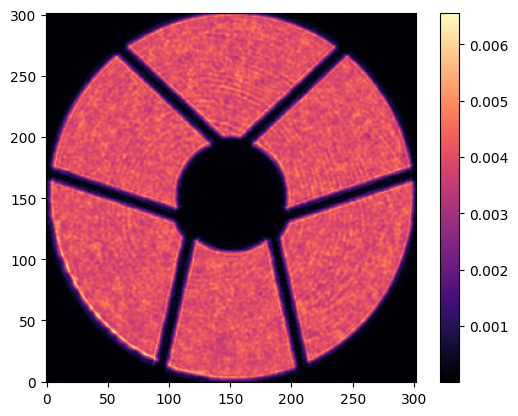

In [6]:
mp = pr.ipr(mp)

# Flesh out the workspace

hlc_575_test
 Using 1 discrete wavelength(s) in each of 1 sub-bandpasses over a 1.0% total bandpass 

Sub-bandpasses are centered at wavelengths [nm]:	 [575.]


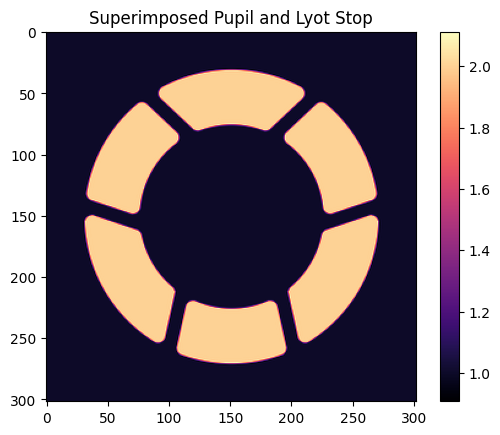

  Influence function padded from 84 to 84 points for A.S. propagation.
Computing datacube of DM influence functions... done.
  Influence function padded from 84 to 84 points for A.S. propagation.
Computing datacube of DM influence functions... done.


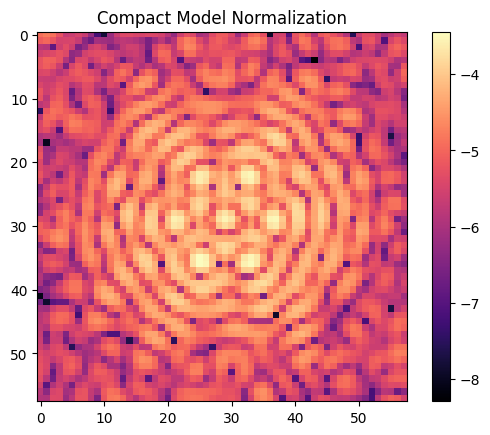

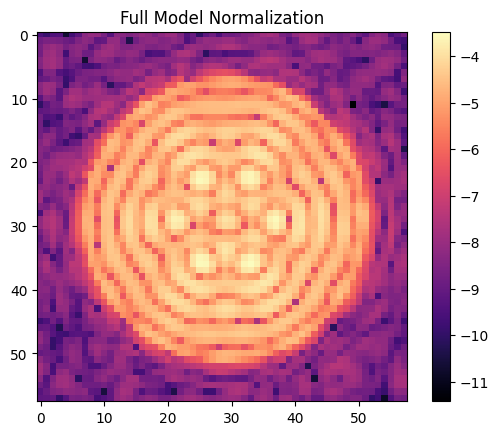


Beginning Trial 1 of Series 1.

DM 1-to-2 Fresnel number (using radius) = 932.0391304347827


In [7]:
# Record Keeping
mp.runLabel = ('hlc_575_test')
print(mp.runLabel)
mp.TrialNum = 1
mp.SeriesNum = 1


out = falco.setup.flesh_out_workspace(mp)


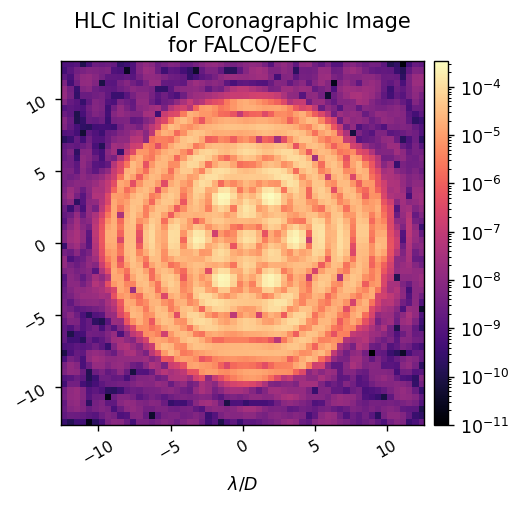

In [7]:
image = falco.get_summed_image(mp)
imshow1(image,  'HLC Initial Coronagraphic Image\nfor FALCO/EFC', 
        lognorm=True, vmin=1e-11, pxscl=1/mp.Fend.res, xlabel='$\lambda/D$')

# Perform the Wavefront Sensing and Control

Iteration: 0 / 19
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


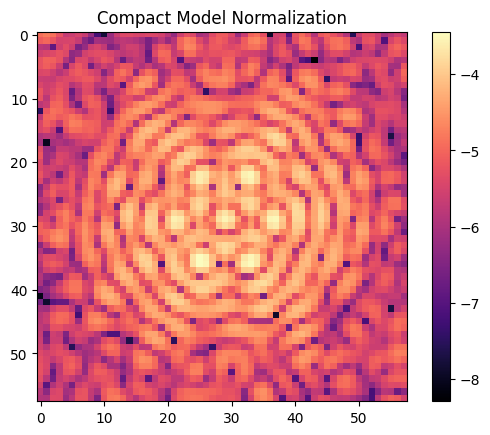

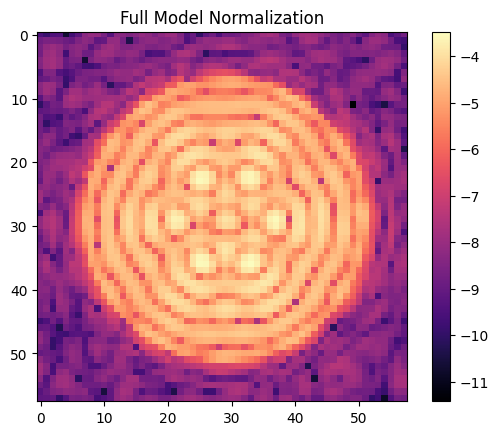

Core throughput within the half-max isophote(s) = 7.52% 	at separation = (-7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in parallel...done.
Elapsed: 31.556429862976074
Weeding out weak actuators from the control Jacobian...
  DM1: 1775/2304 (77.04%) actuators kept for Jacobian
  DM2: 1782/2304 (77.34%) actuators kept for Jacobian
[Getting updated summed image]	Elapsed: 17.419036626815796


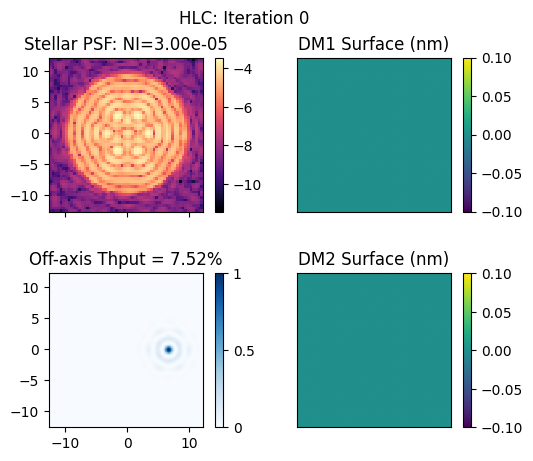

Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		0.50		0.50		0.50		0.50		0.50		0.50		0.50		0.50		
log10reg:    		-6.0		-5.5		-5.0		-4.5		-4.0		-3.5		-3.0		-2.5		
Inorm:       		2.01e-05	1.06e-05	8.08e-06	7.19e-06	6.94e-06	6.98e-06	7.17e-06	7.54e-06	
Model-based grid search expects log10reg, = -4.0,	 dmfac = 0.50,	 6.94e-06 normalized intensity.
 DM1 P-V in volts: 22.875
 DM2 P-V in volts: 54.028
RMS surface of DM1 = 3.2 nm
RMS surface of DM2 = 4.2 nm
Previous Measured NI:			 3.00e-05 
Saving data snippet to:
	/home/u21/kianmilani/Documents/falco-python/data/brief/hlc_575_test_snippet.pkl  ...done.

Iteration: 1 / 19
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


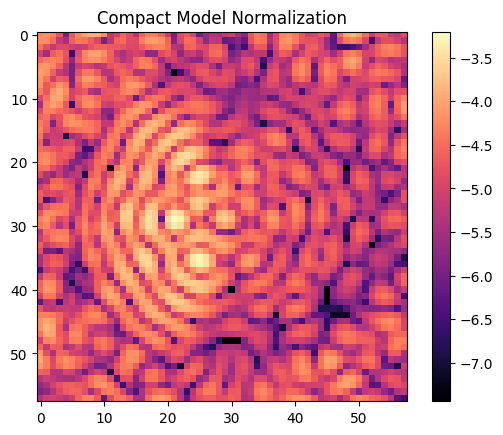

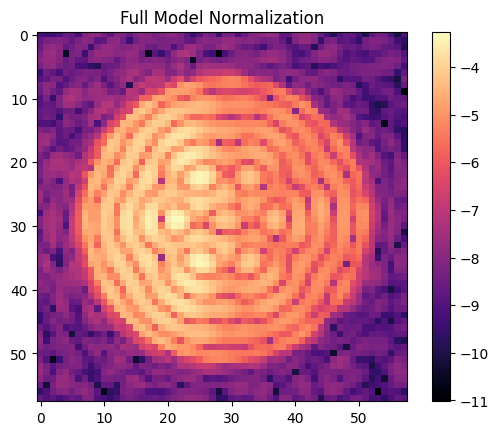

Core throughput within the half-max isophote(s) = 7.51% 	at separation = (-7.0, 0.0) lambda0/D.
[Getting updated summed image]	Elapsed: 17.169742345809937


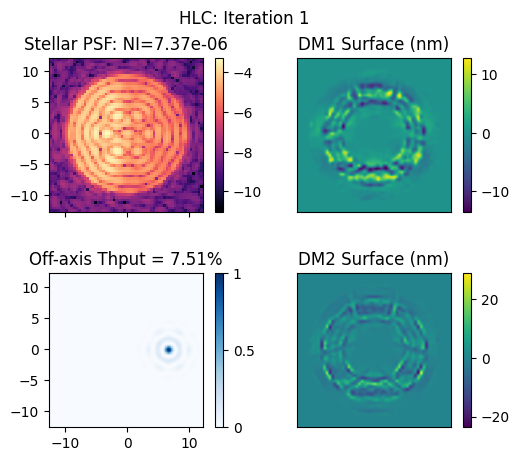

Complex projection of deltaE is 0.98    for subband 0/0
Complex correlation of deltaE is 0.99    for subband 0/0
Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		0.50		0.50		0.50		0.50		0.50		0.50		0.50		0.50		
log10reg:    		-6.0		-5.5		-5.0		-4.5		-4.0		-3.5		-3.0		-2.5		
Inorm:       		9.70e-06	4.40e-06	2.87e-06	2.15e-06	1.82e-06	1.70e-06	1.69e-06	1.78e-06	
Model-based grid search expects log10reg, = -3.0,	 dmfac = 0.50,	 1.69e-06 normalized intensity.
 DM1 P-V in volts: 31.906
 DM2 P-V in volts: 69.177
RMS surface of DM1 = 4.4 nm
RMS surface of DM2 = 5.7 nm
Previous Measured NI:			 7.37e-06 
Saving data snippet to:
	/home/u21/kianmilani/Documents/falco-python/data/brief/hlc_575_test_snippet.pkl  ...done.

Iteration: 2 / 19
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


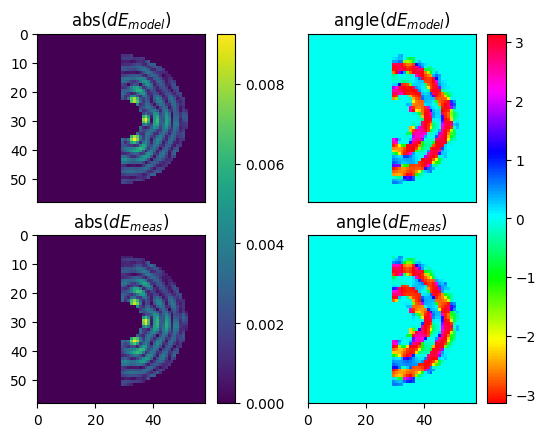

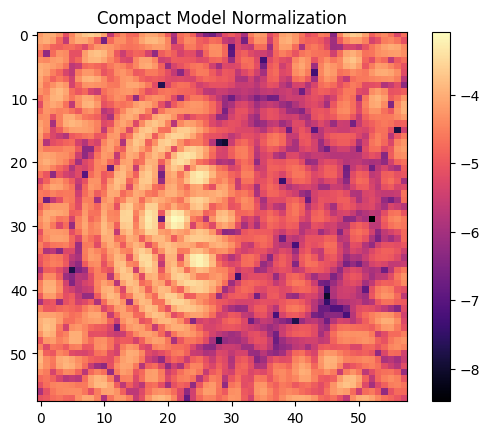

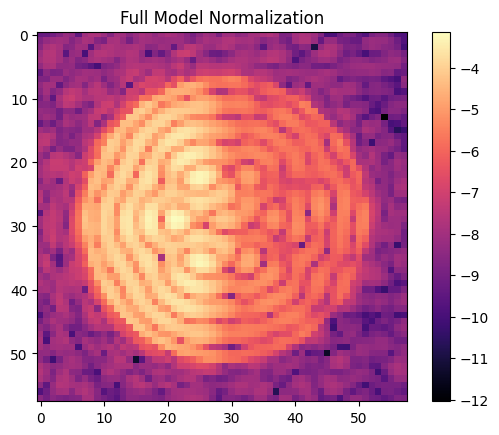

Core throughput within the half-max isophote(s) = 7.45% 	at separation = (-7.0, 0.0) lambda0/D.
[Getting updated summed image]	Elapsed: 17.54122233390808


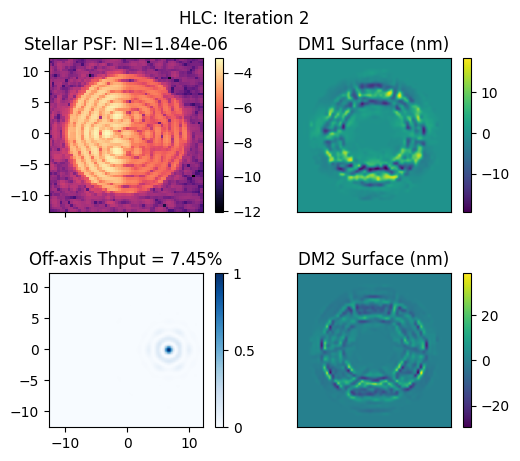

Complex projection of deltaE is 0.99    for subband 0/0
Complex correlation of deltaE is 0.99    for subband 0/0
Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		0.50		0.50		0.50		0.50		0.50		0.50		0.50		0.50		
log10reg:    		-6.0		-5.5		-5.0		-4.5		-4.0		-3.5		-3.0		-2.5		
Inorm:       		5.00e-06	2.78e-06	1.87e-06	1.32e-06	6.73e-07	5.53e-07	5.12e-07	5.20e-07	
Model-based grid search expects log10reg, = -3.0,	 dmfac = 0.50,	 5.12e-07 normalized intensity.
 DM1 P-V in volts: 39.033
 DM2 P-V in volts: 77.991
RMS surface of DM1 = 5.3 nm
RMS surface of DM2 = 6.7 nm
Previous Measured NI:			 1.84e-06 
Saving data snippet to:
	/home/u21/kianmilani/Documents/falco-python/data/brief/hlc_575_test_snippet.pkl  ...done.

Iteration: 3 / 19
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


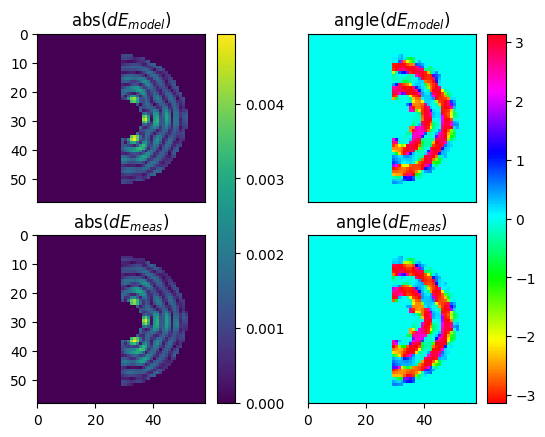

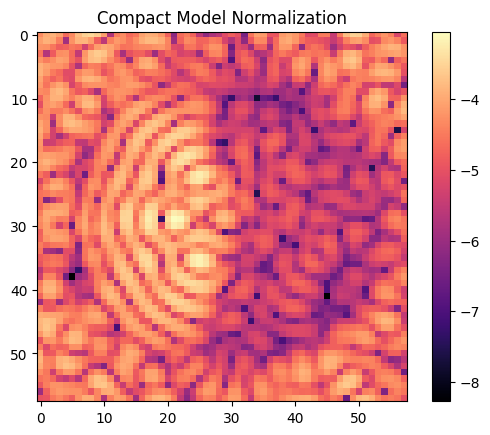

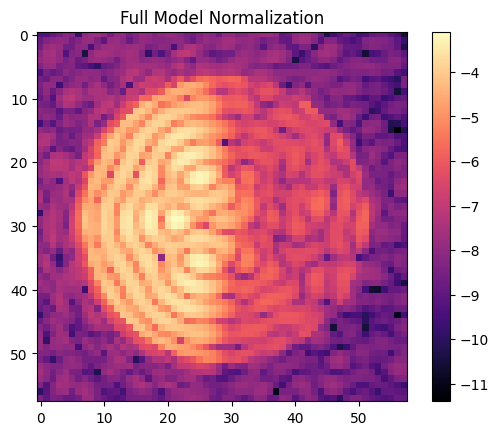

Core throughput within the half-max isophote(s) = 7.40% 	at separation = (-7.0, 0.0) lambda0/D.
[Getting updated summed image]	Elapsed: 17.327426195144653


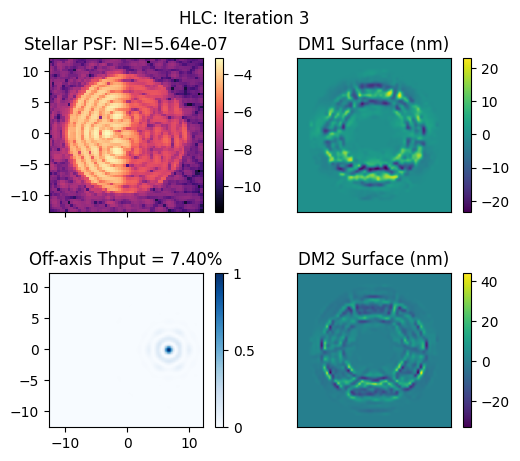

Complex projection of deltaE is 0.99    for subband 0/0
Complex correlation of deltaE is 0.99    for subband 0/0
Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		0.50		0.50		0.50		0.50		0.50		0.50		0.50		0.50		
log10reg:    		-6.0		-5.5		-5.0		-4.5		-4.0		-3.5		-3.0		-2.5		
Inorm:       		3.52e-06	1.95e-06	1.29e-06	8.66e-07	5.55e-07	2.70e-07	2.26e-07	2.14e-07	
Model-based grid search expects log10reg, = -2.5,	 dmfac = 0.50,	 2.14e-07 normalized intensity.
 DM1 P-V in volts: 42.448
 DM2 P-V in volts: 82.705
RMS surface of DM1 = 5.6 nm
RMS surface of DM2 = 7.2 nm
Previous Measured NI:			 5.64e-07 
Saving data snippet to:
	/home/u21/kianmilani/Documents/falco-python/data/brief/hlc_575_test_snippet.pkl  ...done.

Iteration: 4 / 19
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


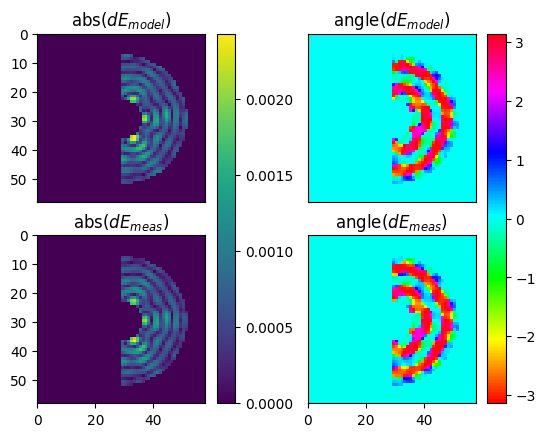

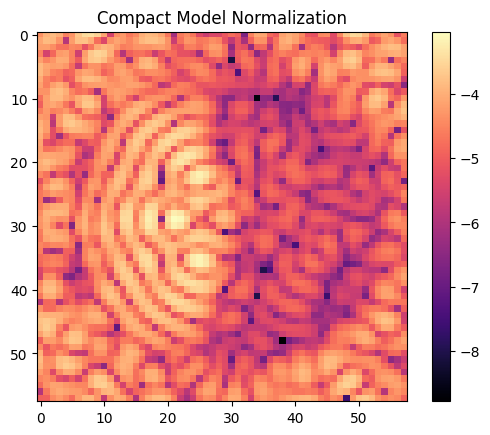

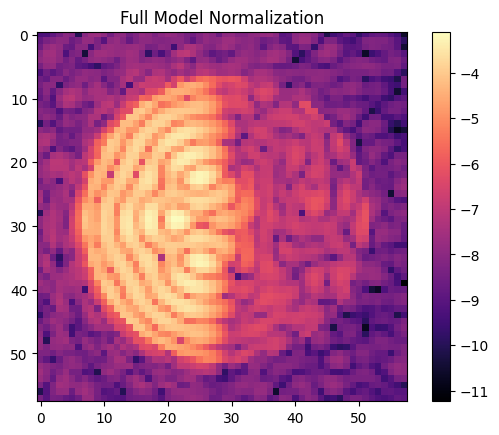

Core throughput within the half-max isophote(s) = 7.44% 	at separation = (-7.0, 0.0) lambda0/D.
[Getting updated summed image]	Elapsed: 17.405795097351074


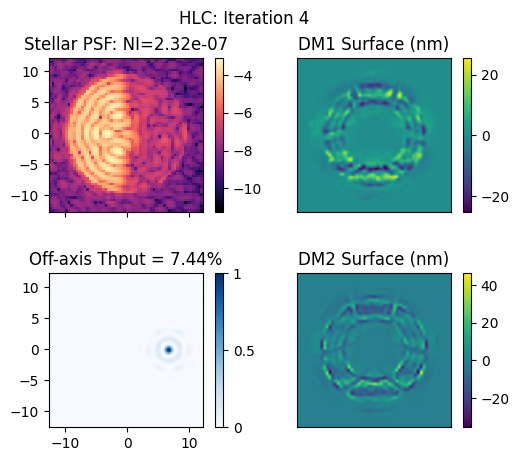

Complex projection of deltaE is 0.99    for subband 0/0
Complex correlation of deltaE is 0.99    for subband 0/0
Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		0.50		0.50		0.50		0.50		0.50		0.50		0.50		0.50		
log10reg:    		-6.0		-5.5		-5.0		-4.5		-4.0		-3.5		-3.0		-2.5		
Inorm:       		2.97e-06	1.56e-06	1.03e-06	6.68e-07	3.99e-07	1.67e-07	1.31e-07	1.19e-07	
Model-based grid search expects log10reg, = -2.5,	 dmfac = 0.50,	 1.19e-07 normalized intensity.
 DM1 P-V in volts: 45.083
 DM2 P-V in volts: 86.446
RMS surface of DM1 = 5.9 nm
RMS surface of DM2 = 7.6 nm
Previous Measured NI:			 2.32e-07 
Saving data snippet to:
	/home/u21/kianmilani/Documents/falco-python/data/brief/hlc_575_test_snippet.pkl  ...done.

Iteration: 5 / 19
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


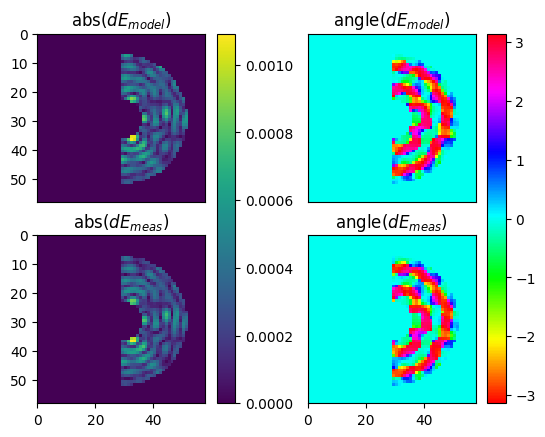

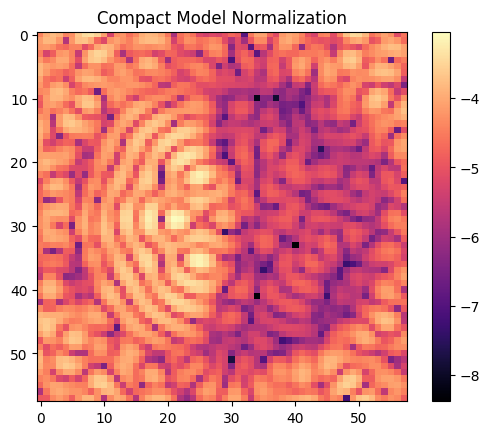

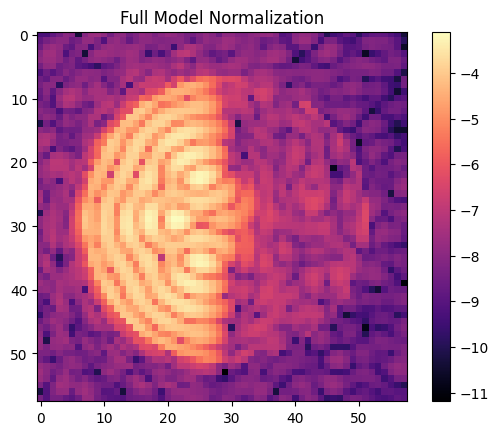

Core throughput within the half-max isophote(s) = 7.42% 	at separation = (-7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in parallel...done.
Elapsed: 24.525537252426147
[Getting updated summed image]	Elapsed: 17.61263418197632


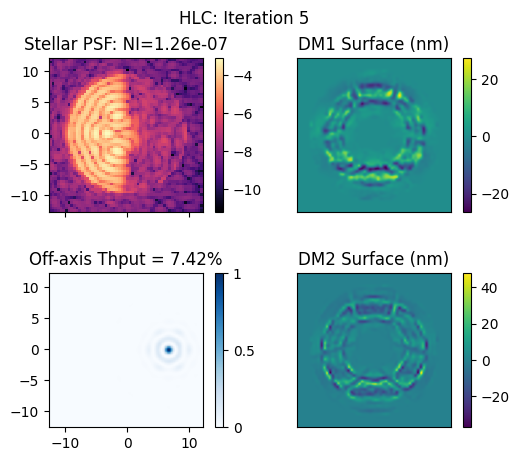

Complex projection of deltaE is 0.98    for subband 0/0
Complex correlation of deltaE is 0.98    for subband 0/0
Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		0.50		0.50		0.50		0.50		0.50		0.50		0.50		0.50		
log10reg:    		-6.0		-5.5		-5.0		-4.5		-4.0		-3.5		-3.0		-2.5		
Inorm:       		6.03e-07	3.78e-07	2.21e-07	1.16e-07	6.59e-08	5.19e-08	5.15e-08	5.51e-08	
Model-based grid search expects log10reg, = -3.0,	 dmfac = 0.50,	 5.15e-08 normalized intensity.
 DM1 P-V in volts: 45.586
 DM2 P-V in volts: 85.901
RMS surface of DM1 = 6.1 nm
RMS surface of DM2 = 7.7 nm
Previous Measured NI:			 1.26e-07 
Saving data snippet to:
	/home/u21/kianmilani/Documents/falco-python/data/brief/hlc_575_test_snippet.pkl  ...done.

Iteration: 6 / 19
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


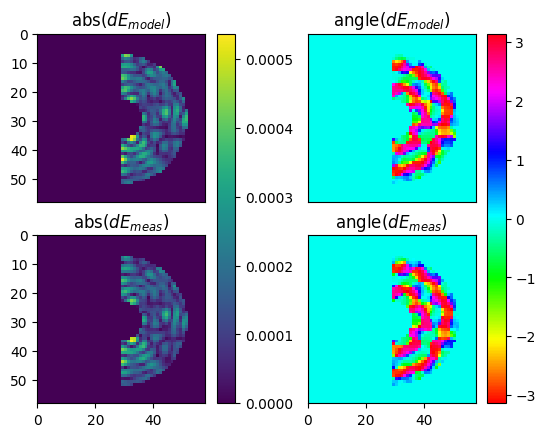

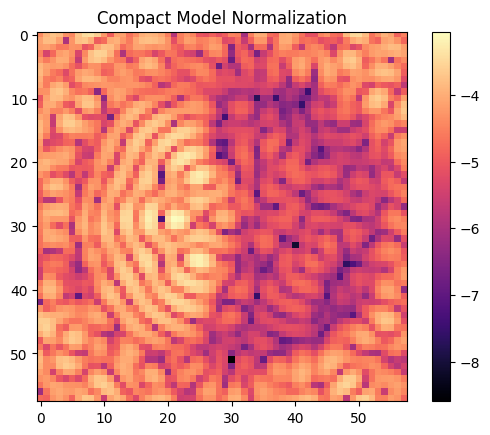

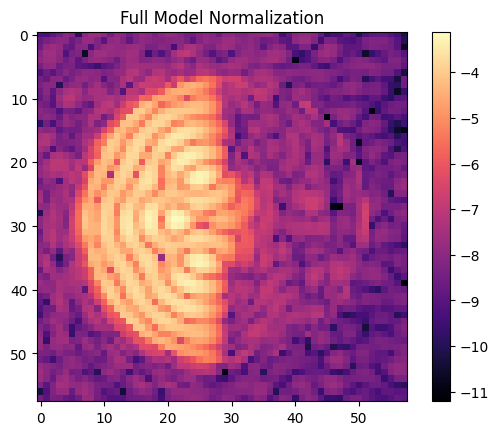

Core throughput within the half-max isophote(s) = 7.42% 	at separation = (-7.0, 0.0) lambda0/D.
[Getting updated summed image]	Elapsed: 17.51679539680481


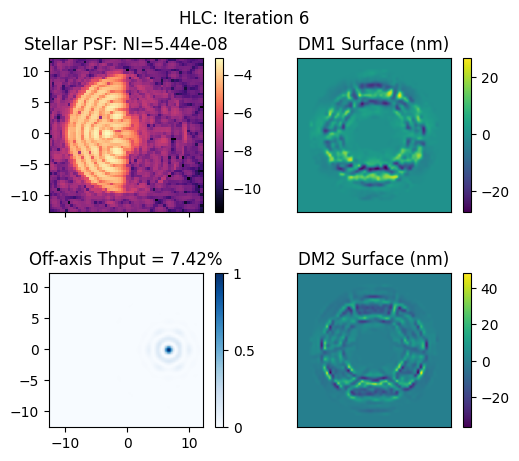

Complex projection of deltaE is 1.14    for subband 0/0
Complex correlation of deltaE is 1.00    for subband 0/0
Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		0.50		0.50		0.50		0.50		0.50		0.50		0.50		0.50		
log10reg:    		-6.0		-5.5		-5.0		-4.5		-4.0		-3.5		-3.0		-2.5		
Inorm:       		6.53e-07	4.01e-07	2.29e-07	1.13e-07	5.46e-08	3.50e-08	3.12e-08	3.19e-08	
Model-based grid search expects log10reg, = -3.0,	 dmfac = 0.50,	 3.12e-08 normalized intensity.
 DM1 P-V in volts: 46.056
 DM2 P-V in volts: 85.471
RMS surface of DM1 = 6.1 nm
RMS surface of DM2 = 7.8 nm
Previous Measured NI:			 5.44e-08 
Saving data snippet to:
	/home/u21/kianmilani/Documents/falco-python/data/brief/hlc_575_test_snippet.pkl  ...done.

Iteration: 7 / 19
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


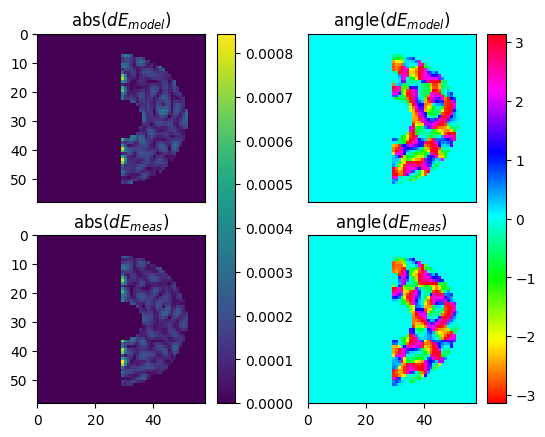

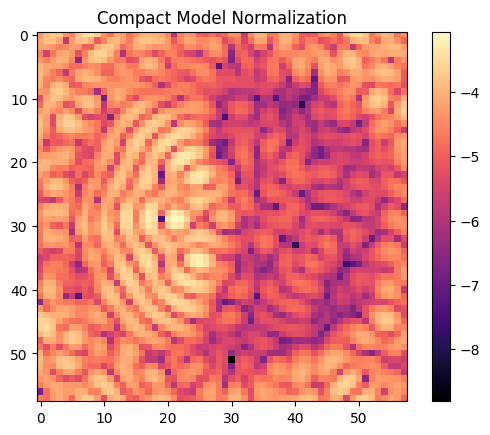

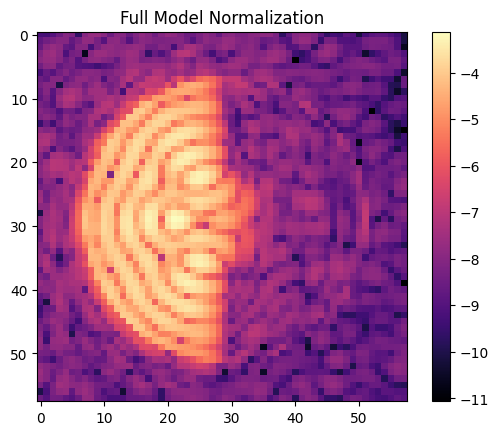

Core throughput within the half-max isophote(s) = 7.41% 	at separation = (-7.0, 0.0) lambda0/D.
[Getting updated summed image]	Elapsed: 18.233684539794922


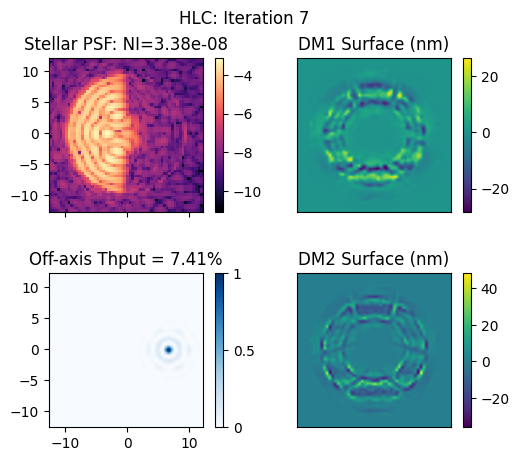

Complex projection of deltaE is 1.11    for subband 0/0
Complex correlation of deltaE is 0.97    for subband 0/0
Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		0.50		0.50		0.50		0.50		0.50		0.50		0.50		0.50		
log10reg:    		-6.0		-5.5		-5.0		-4.5		-4.0		-3.5		-3.0		-2.5		
Inorm:       		7.22e-07	4.37e-07	2.48e-07	1.22e-07	5.50e-08	3.05e-08	2.43e-08	2.35e-08	
Model-based grid search expects log10reg, = -2.5,	 dmfac = 0.50,	 2.35e-08 normalized intensity.
 DM1 P-V in volts: 46.190
 DM2 P-V in volts: 85.347
RMS surface of DM1 = 6.2 nm
RMS surface of DM2 = 7.8 nm
Previous Measured NI:			 3.38e-08 
Saving data snippet to:
	/home/u21/kianmilani/Documents/falco-python/data/brief/hlc_575_test_snippet.pkl  ...done.

Iteration: 8 / 19
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


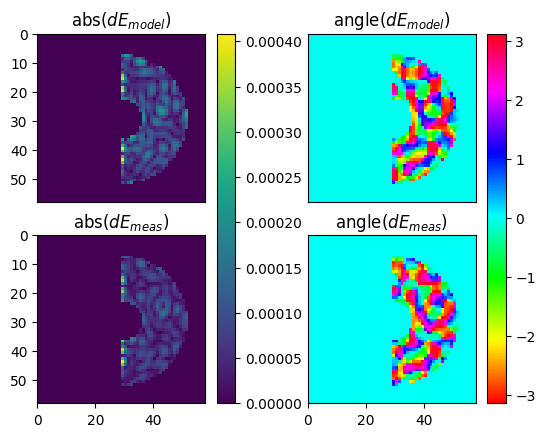

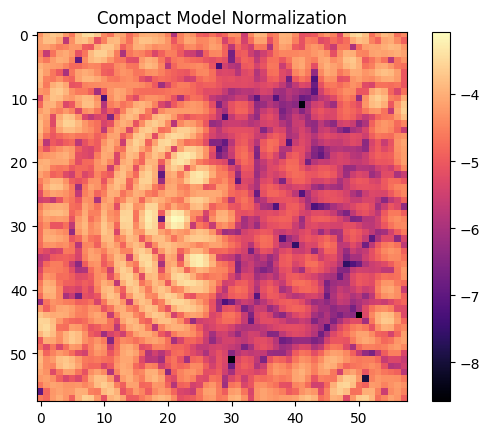

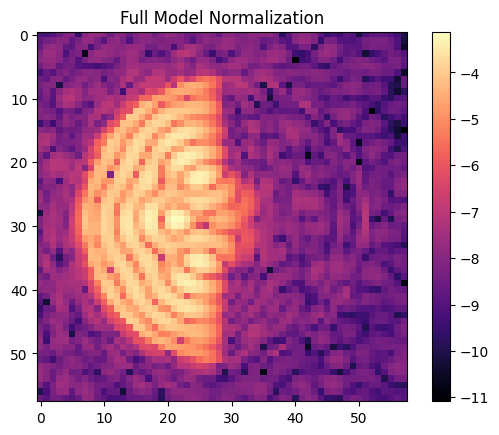

Core throughput within the half-max isophote(s) = 7.41% 	at separation = (-7.0, 0.0) lambda0/D.
[Getting updated summed image]	Elapsed: 18.172184944152832


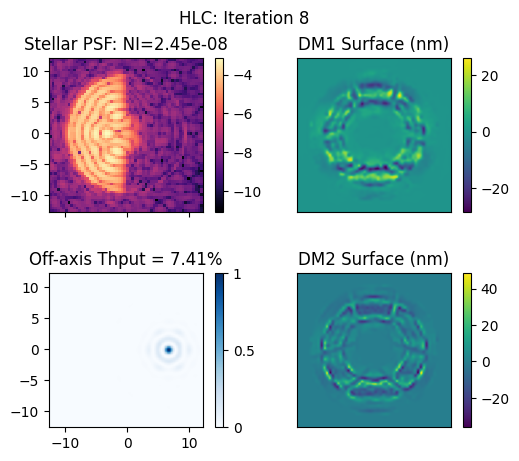

Complex projection of deltaE is 2.15    for subband 0/0
Complex correlation of deltaE is 1.24    for subband 0/0
Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		0.50		0.50		0.50		0.50		0.50		0.50		0.50		0.50		
log10reg:    		-6.0		-5.5		-5.0		-4.5		-4.0		-3.5		-3.0		-2.5		
Inorm:       		7.40e-07	4.39e-07	2.46e-07	1.19e-07	5.16e-08	2.69e-08	2.06e-08	1.98e-08	
Model-based grid search expects log10reg, = -2.5,	 dmfac = 0.50,	 1.98e-08 normalized intensity.
 DM1 P-V in volts: 46.316
 DM2 P-V in volts: 85.512
RMS surface of DM1 = 6.2 nm
RMS surface of DM2 = 7.9 nm
Previous Measured NI:			 2.45e-08 
Saving data snippet to:
	/home/u21/kianmilani/Documents/falco-python/data/brief/hlc_575_test_snippet.pkl  ...done.

Iteration: 9 / 19
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


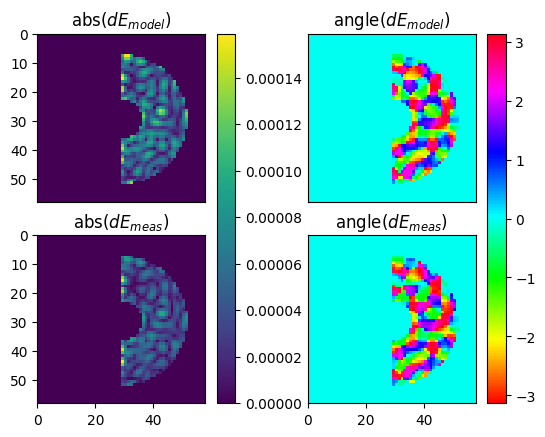

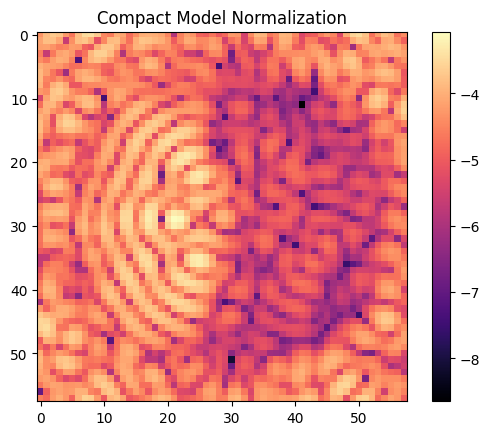

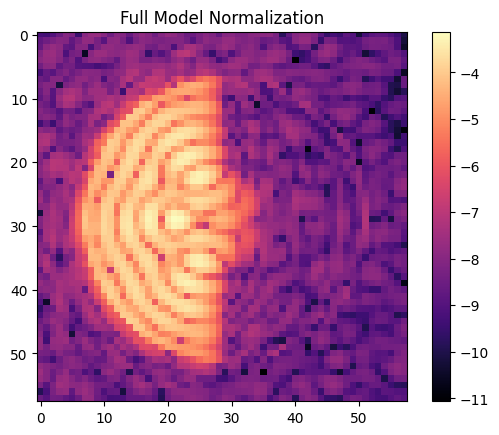

Core throughput within the half-max isophote(s) = 7.41% 	at separation = (-7.0, 0.0) lambda0/D.
[Getting updated summed image]	Elapsed: 17.299870491027832


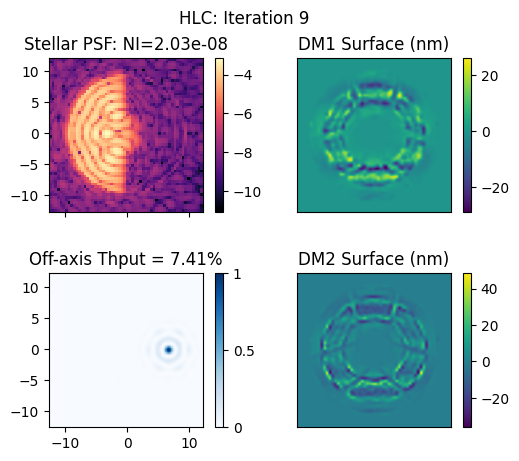

Complex projection of deltaE is 1.92    for subband 0/0
Complex correlation of deltaE is 0.99    for subband 0/0
Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		0.50		0.50		0.50		0.50		0.50		0.50		0.50		0.50		
log10reg:    		-6.0		-5.5		-5.0		-4.5		-4.0		-3.5		-3.0		-2.5		
Inorm:       		7.61e-07	4.45e-07	2.47e-07	1.19e-07	5.02e-08	2.51e-08	1.86e-08	1.77e-08	
Model-based grid search expects log10reg, = -2.5,	 dmfac = 0.50,	 1.77e-08 normalized intensity.
 DM1 P-V in volts: 46.439
 DM2 P-V in volts: 85.716
RMS surface of DM1 = 6.3 nm
RMS surface of DM2 = 7.9 nm
Previous Measured NI:			 2.03e-08 
Saving data snippet to:
	/home/u21/kianmilani/Documents/falco-python/data/brief/hlc_575_test_snippet.pkl  ...done.

Iteration: 10 / 19
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


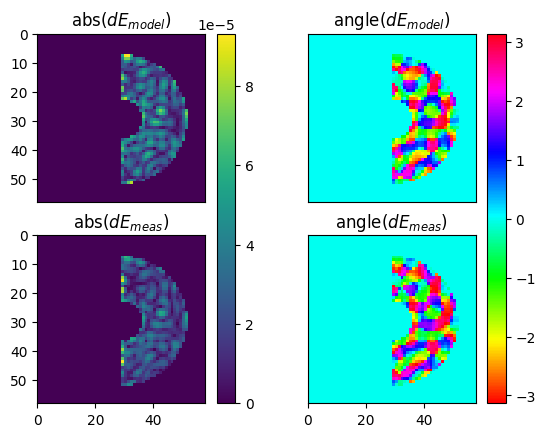

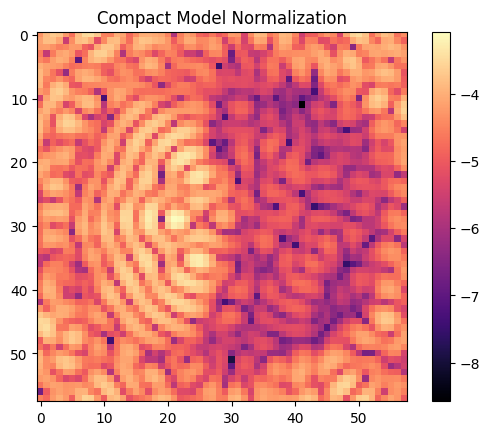

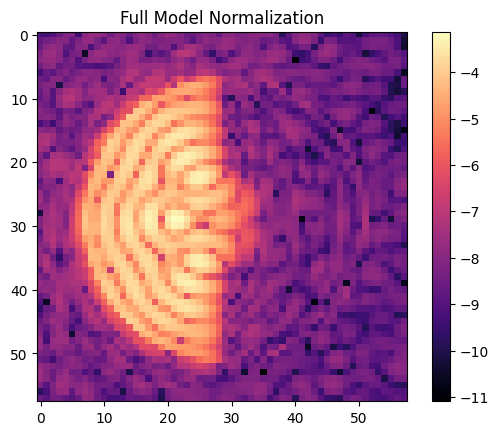

Core throughput within the half-max isophote(s) = 7.41% 	at separation = (-7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in parallel...done.
Elapsed: 25.157416820526123
[Getting updated summed image]	Elapsed: 17.41809368133545


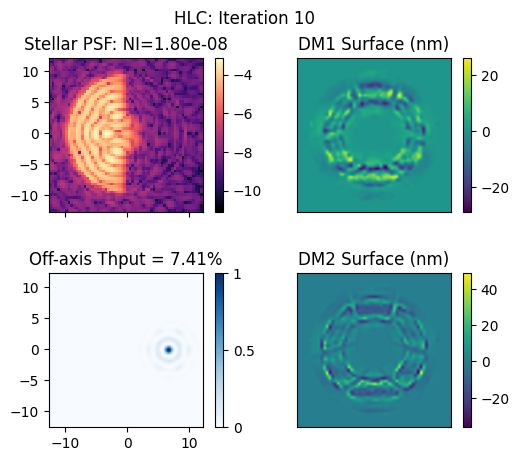

Complex projection of deltaE is 0.14    for subband 0/0
Complex correlation of deltaE is 0.15    for subband 0/0
Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		0.50		0.50		0.50		0.50		0.50		0.50		0.50		0.50		
log10reg:    		-6.0		-5.5		-5.0		-4.5		-4.0		-3.5		-3.0		-2.5		
Inorm:       		2.48e-07	1.22e-07	5.55e-08	2.23e-08	1.23e-08	1.23e-08	1.41e-08	1.54e-08	
Model-based grid search expects log10reg, = -4.0,	 dmfac = 0.50,	 1.23e-08 normalized intensity.
 DM1 P-V in volts: 48.534
 DM2 P-V in volts: 86.197
RMS surface of DM1 = 6.5 nm
RMS surface of DM2 = 8.1 nm
Previous Measured NI:			 1.80e-08 
Saving data snippet to:
	/home/u21/kianmilani/Documents/falco-python/data/brief/hlc_575_test_snippet.pkl  ...done.

Iteration: 11 / 19
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


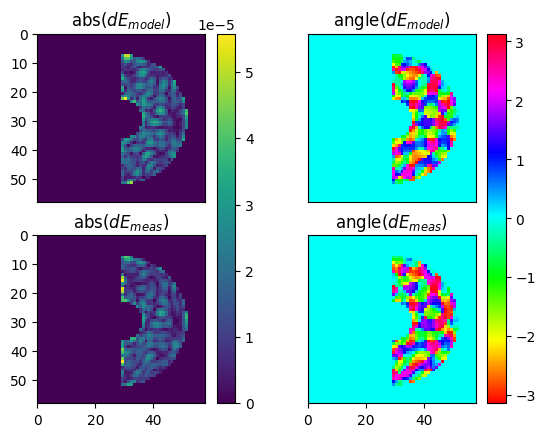

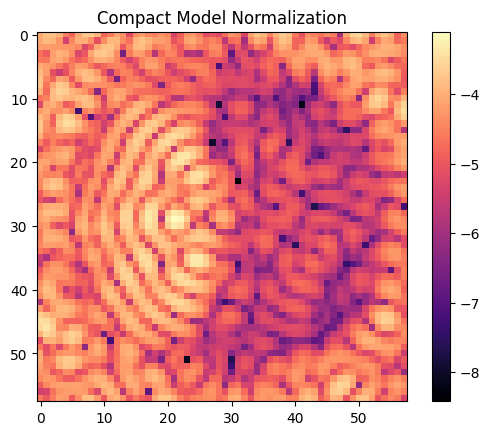

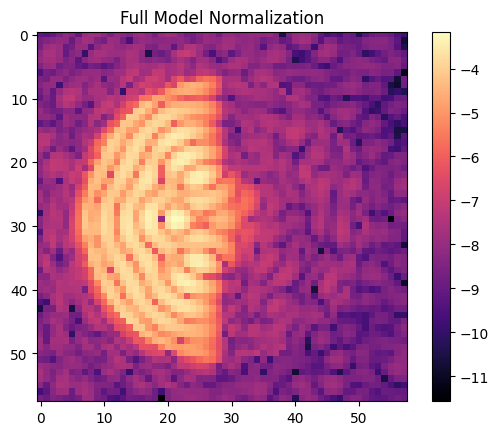

Core throughput within the half-max isophote(s) = 7.33% 	at separation = (-7.0, 0.0) lambda0/D.
[Getting updated summed image]	Elapsed: 17.23371911048889


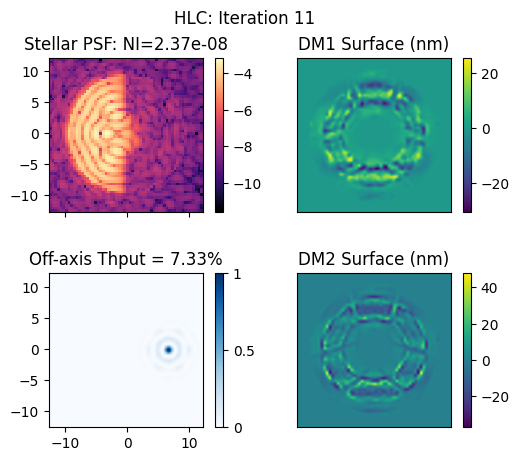

Complex projection of deltaE is 0.97    for subband 0/0
Complex correlation of deltaE is 0.99    for subband 0/0
Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		0.50		0.50		0.50		0.50		0.50		0.50		0.50		0.50		
log10reg:    		-6.0		-5.5		-5.0		-4.5		-4.0		-3.5		-3.0		-2.5		
Inorm:       		3.40e-07	1.88e-07	1.03e-07	4.86e-08	2.20e-08	1.42e-08	1.27e-08	1.27e-08	
Model-based grid search expects log10reg, = -2.5,	 dmfac = 0.50,	 1.27e-08 normalized intensity.
 DM1 P-V in volts: 48.552
 DM2 P-V in volts: 86.436
RMS surface of DM1 = 6.5 nm
RMS surface of DM2 = 8.2 nm
Previous Measured NI:			 2.37e-08 
Saving data snippet to:
	/home/u21/kianmilani/Documents/falco-python/data/brief/hlc_575_test_snippet.pkl  ...done.

Iteration: 12 / 19
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


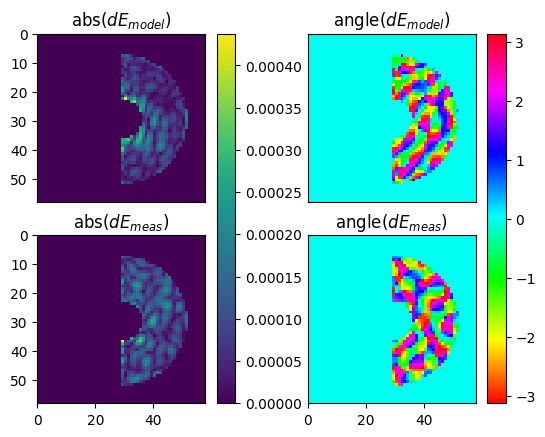

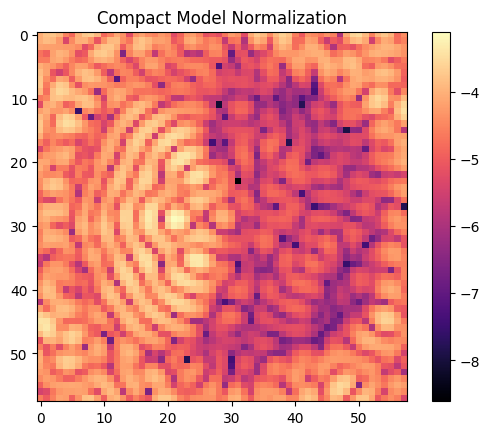

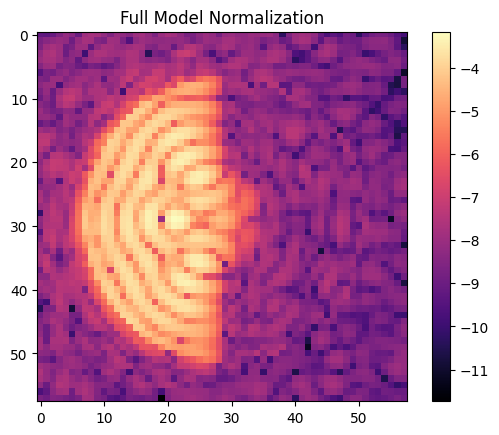

Core throughput within the half-max isophote(s) = 7.33% 	at separation = (-7.0, 0.0) lambda0/D.
[Getting updated summed image]	Elapsed: 17.53106451034546


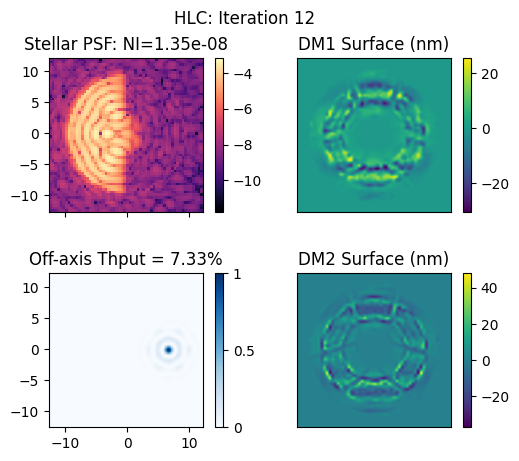

Complex projection of deltaE is 0.89    for subband 0/0
Complex correlation of deltaE is 0.98    for subband 0/0
Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		0.50		0.50		0.50		0.50		0.50		0.50		0.50		0.50		
log10reg:    		-6.0		-5.5		-5.0		-4.5		-4.0		-3.5		-3.0		-2.5		
Inorm:       		3.42e-07	1.84e-07	9.72e-08	4.36e-08	1.80e-08	1.08e-08	9.68e-09	9.71e-09	
Model-based grid search expects log10reg, = -3.0,	 dmfac = 0.50,	 9.68e-09 normalized intensity.
 DM1 P-V in volts: 48.755
 DM2 P-V in volts: 86.757
RMS surface of DM1 = 6.6 nm
RMS surface of DM2 = 8.2 nm
Previous Measured NI:			 1.35e-08 
Saving data snippet to:
	/home/u21/kianmilani/Documents/falco-python/data/brief/hlc_575_test_snippet.pkl  ...done.

Iteration: 13 / 19
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


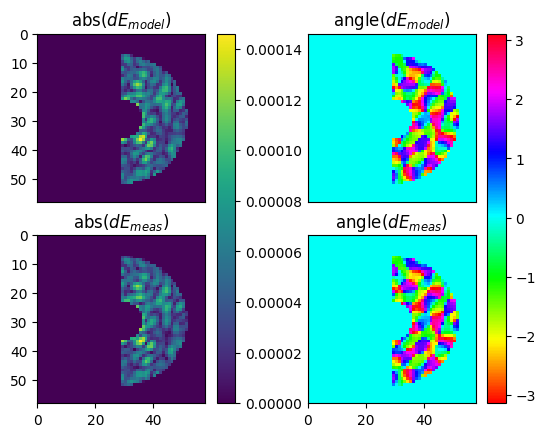

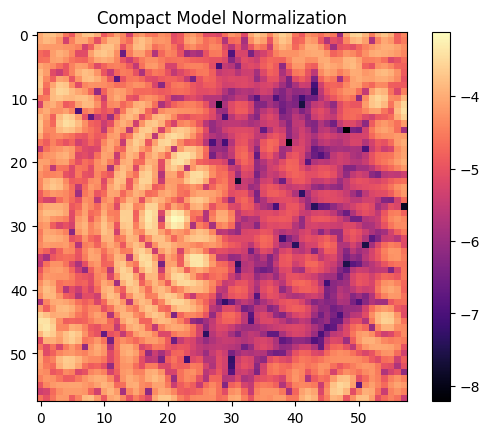

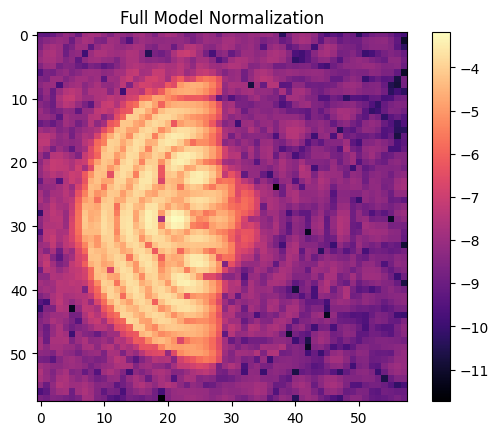

Core throughput within the half-max isophote(s) = 7.33% 	at separation = (-7.0, 0.0) lambda0/D.
[Getting updated summed image]	Elapsed: 17.182063102722168


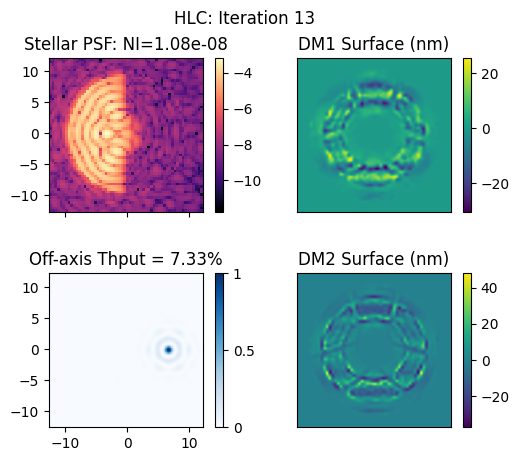

Complex projection of deltaE is 0.50    for subband 0/0
Complex correlation of deltaE is 0.95    for subband 0/0
Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		0.50		0.50		0.50		0.50		0.50		0.50		0.50		0.50		
log10reg:    		-6.0		-5.5		-5.0		-4.5		-4.0		-3.5		-3.0		-2.5		
Inorm:       		3.56e-07	1.90e-07	9.96e-08	4.42e-08	1.76e-08	9.96e-09	8.55e-09	8.45e-09	
Model-based grid search expects log10reg, = -2.5,	 dmfac = 0.50,	 8.45e-09 normalized intensity.
 DM1 P-V in volts: 48.788
 DM2 P-V in volts: 86.903
RMS surface of DM1 = 6.6 nm
RMS surface of DM2 = 8.2 nm
Previous Measured NI:			 1.08e-08 
Saving data snippet to:
	/home/u21/kianmilani/Documents/falco-python/data/brief/hlc_575_test_snippet.pkl  ...done.

Iteration: 14 / 19
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


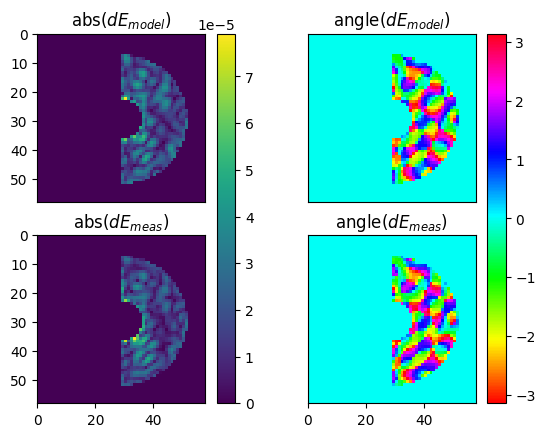

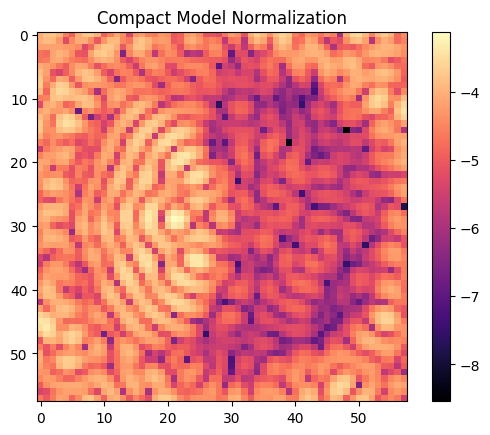

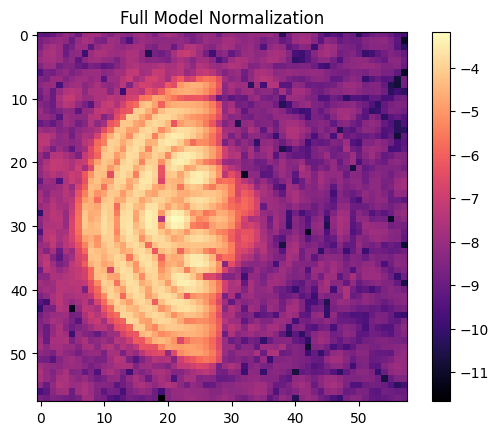

Core throughput within the half-max isophote(s) = 7.32% 	at separation = (-7.0, 0.0) lambda0/D.
[Getting updated summed image]	Elapsed: 17.222720861434937


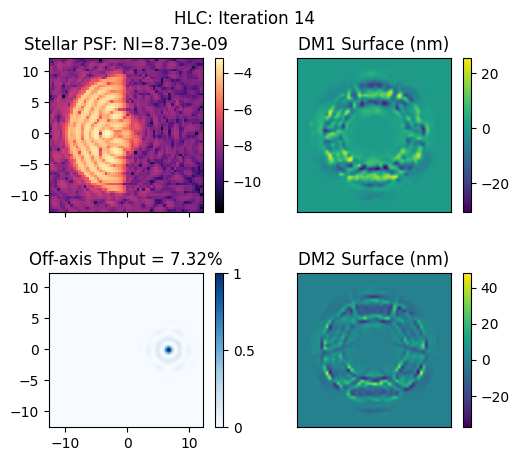

Complex projection of deltaE is 0.81    for subband 0/0
Complex correlation of deltaE is 0.98    for subband 0/0
Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		0.50		0.50		0.50		0.50		0.50		0.50		0.50		0.50		
log10reg:    		-6.0		-5.5		-5.0		-4.5		-4.0		-3.5		-3.0		-2.5		
Inorm:       		3.60e-07	1.90e-07	9.81e-08	4.25e-08	1.62e-08	8.95e-09	7.72e-09	7.67e-09	
Model-based grid search expects log10reg, = -2.5,	 dmfac = 0.50,	 7.67e-09 normalized intensity.
 DM1 P-V in volts: 48.832
 DM2 P-V in volts: 87.020
RMS surface of DM1 = 6.6 nm
RMS surface of DM2 = 8.2 nm
Previous Measured NI:			 8.73e-09 
Saving data snippet to:
	/home/u21/kianmilani/Documents/falco-python/data/brief/hlc_575_test_snippet.pkl  ...done.

Iteration: 15 / 19
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


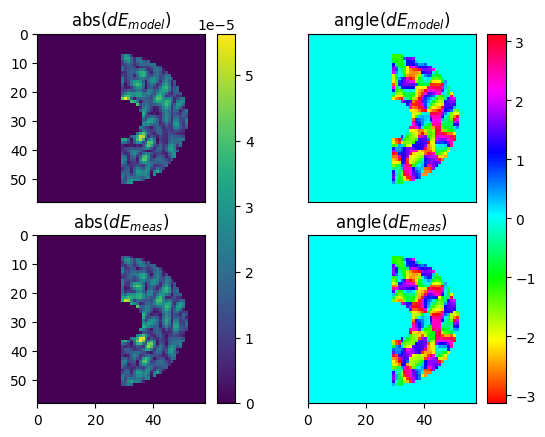

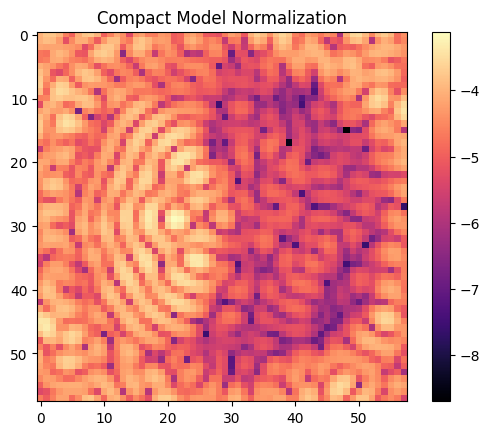

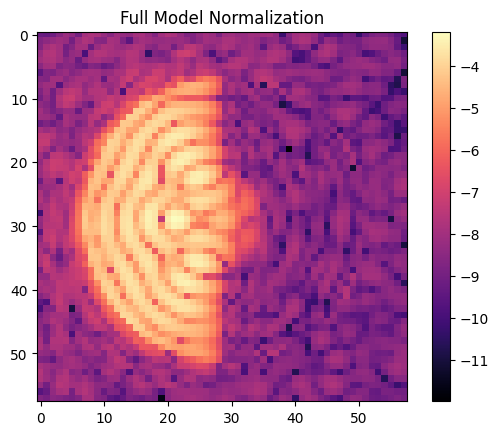

Core throughput within the half-max isophote(s) = 7.32% 	at separation = (-7.0, 0.0) lambda0/D.
Computing control Jacobian matrices in parallel...done.
Elapsed: 24.279841899871826
[Getting updated summed image]	Elapsed: 17.307469129562378


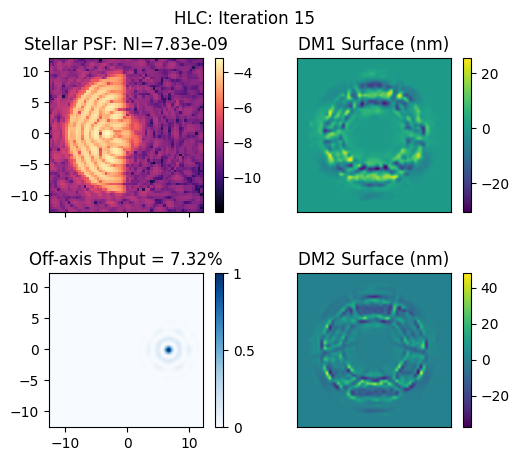

Complex projection of deltaE is 0.68    for subband 0/0
Complex correlation of deltaE is 0.97    for subband 0/0
Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		0.50		0.50		0.50		0.50		0.50		0.50		0.50		0.50		
log10reg:    		-6.0		-5.5		-5.0		-4.5		-4.0		-3.5		-3.0		-2.5		
Inorm:       		1.27e-07	5.04e-08	2.05e-08	9.55e-09	5.99e-09	6.09e-09	6.70e-09	7.08e-09	
Model-based grid search expects log10reg, = -4.0,	 dmfac = 0.50,	 5.99e-09 normalized intensity.
 DM1 P-V in volts: 50.073
 DM2 P-V in volts: 86.758
RMS surface of DM1 = 6.8 nm
RMS surface of DM2 = 8.4 nm
Previous Measured NI:			 7.83e-09 
Saving data snippet to:
	/home/u21/kianmilani/Documents/falco-python/data/brief/hlc_575_test_snippet.pkl  ...done.

Iteration: 16 / 19
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


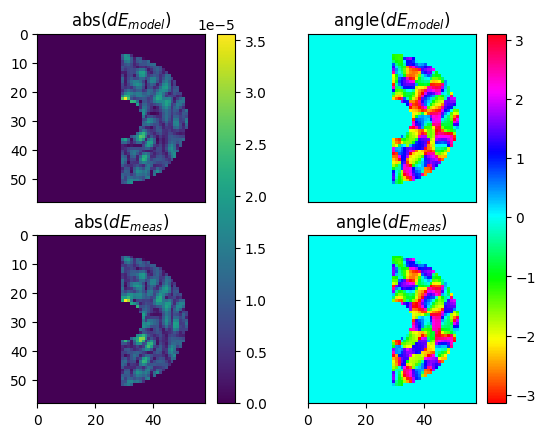

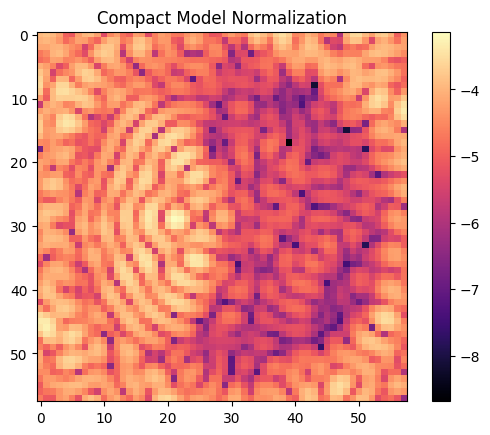

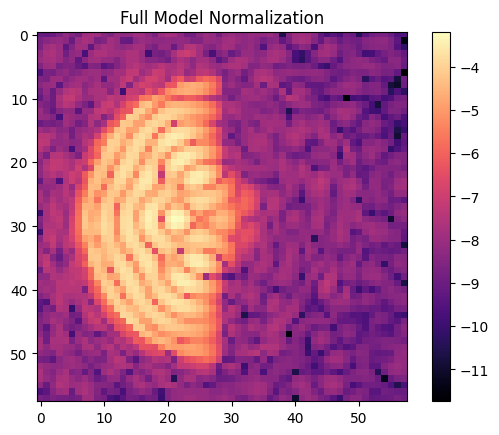

Core throughput within the half-max isophote(s) = 7.30% 	at separation = (-7.0, 0.0) lambda0/D.
[Getting updated summed image]	Elapsed: 17.818212270736694


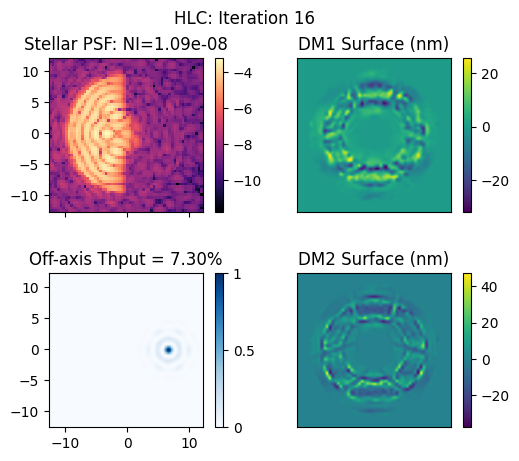

Complex projection of deltaE is 0.89    for subband 0/0
Complex correlation of deltaE is 0.91    for subband 0/0
Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		0.50		0.50		0.50		0.50		0.50		0.50		0.50		0.50		
log10reg:    		-6.0		-5.5		-5.0		-4.5		-4.0		-3.5		-3.0		-2.5		
Inorm:       		1.61e-07	7.47e-08	3.76e-08	1.95e-08	9.92e-09	6.88e-09	6.31e-09	6.27e-09	
Model-based grid search expects log10reg, = -2.5,	 dmfac = 0.50,	 6.27e-09 normalized intensity.
 DM1 P-V in volts: 50.032
 DM2 P-V in volts: 86.849
RMS surface of DM1 = 6.8 nm
RMS surface of DM2 = 8.4 nm
Previous Measured NI:			 1.09e-08 
Saving data snippet to:
	/home/u21/kianmilani/Documents/falco-python/data/brief/hlc_575_test_snippet.pkl  ...done.

Iteration: 17 / 19
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


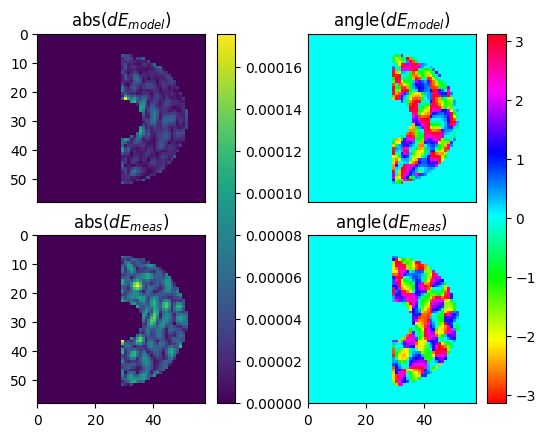

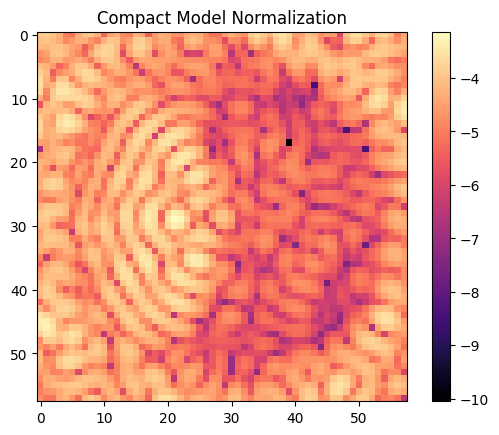

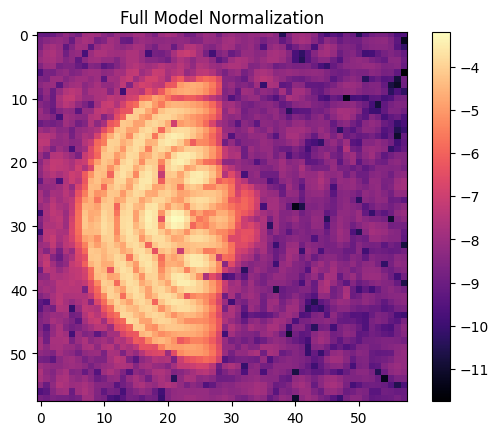

Core throughput within the half-max isophote(s) = 7.30% 	at separation = (-7.0, 0.0) lambda0/D.
[Getting updated summed image]	Elapsed: 17.389111280441284


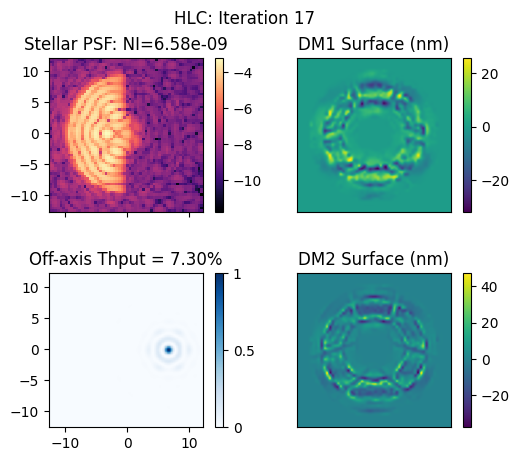

Complex projection of deltaE is 0.90    for subband 0/0
Complex correlation of deltaE is 0.99    for subband 0/0
Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		0.50		0.50		0.50		0.50		0.50		0.50		0.50		0.50		
log10reg:    		-6.0		-5.5		-5.0		-4.5		-4.0		-3.5		-3.0		-2.5		
Inorm:       		1.60e-07	7.29e-08	3.51e-08	1.71e-08	8.03e-09	5.39e-09	5.00e-09	5.02e-09	
Model-based grid search expects log10reg, = -3.0,	 dmfac = 0.50,	 5.00e-09 normalized intensity.
 DM1 P-V in volts: 50.122
 DM2 P-V in volts: 86.920
RMS surface of DM1 = 6.8 nm
RMS surface of DM2 = 8.4 nm
Previous Measured NI:			 6.58e-09 
Saving data snippet to:
	/home/u21/kianmilani/Documents/falco-python/data/brief/hlc_575_test_snippet.pkl  ...done.

Iteration: 18 / 19
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


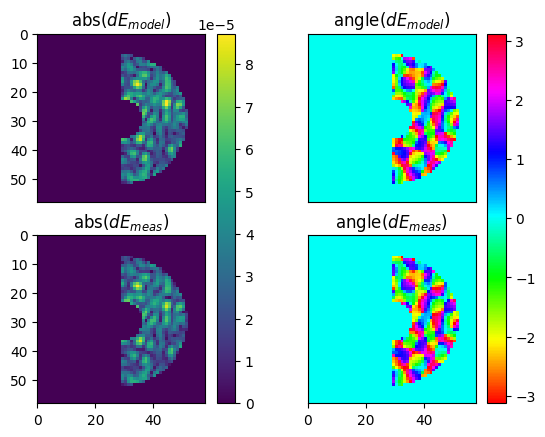

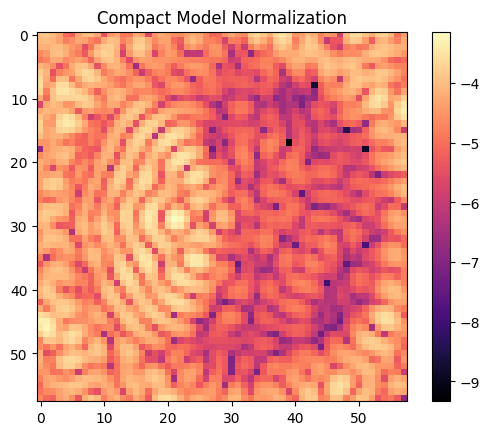

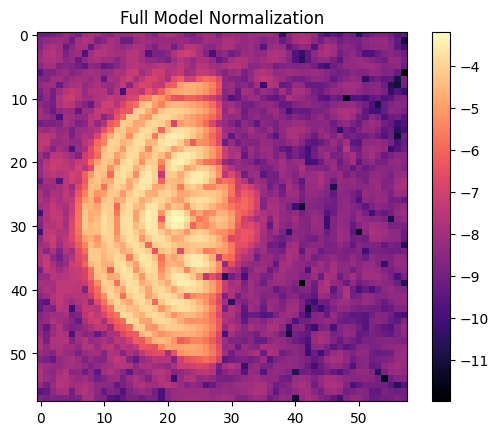

Core throughput within the half-max isophote(s) = 7.29% 	at separation = (-7.0, 0.0) lambda0/D.
[Getting updated summed image]	Elapsed: 17.305826663970947


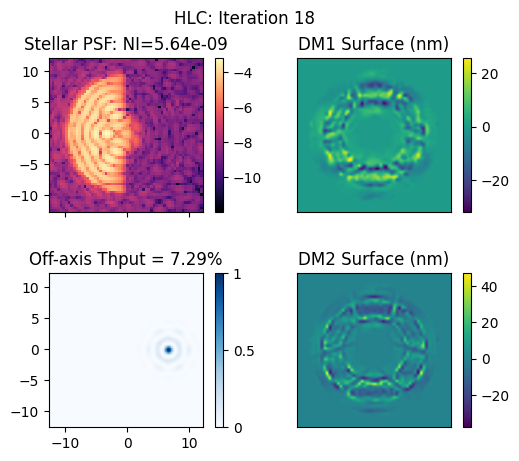

Complex projection of deltaE is 0.62    for subband 0/0
Complex correlation of deltaE is 1.02    for subband 0/0
Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		0.50		0.50		0.50		0.50		0.50		0.50		0.50		0.50		
log10reg:    		-6.0		-5.5		-5.0		-4.5		-4.0		-3.5		-3.0		-2.5		
Inorm:       		1.62e-07	7.41e-08	3.55e-08	1.71e-08	7.81e-09	5.04e-09	4.58e-09	4.56e-09	
Model-based grid search expects log10reg, = -2.5,	 dmfac = 0.50,	 4.56e-09 normalized intensity.
 DM1 P-V in volts: 50.132
 DM2 P-V in volts: 86.958
RMS surface of DM1 = 6.8 nm
RMS surface of DM2 = 8.5 nm
Previous Measured NI:			 5.64e-09 
Saving data snippet to:
	/home/u21/kianmilani/Documents/falco-python/data/brief/hlc_575_test_snippet.pkl  ...done.

Iteration: 19 / 19
Zernike modes (Noll indexing) used in this Jacobian:	[1]
DMs to be used in this iteration = [ 1 2 ]


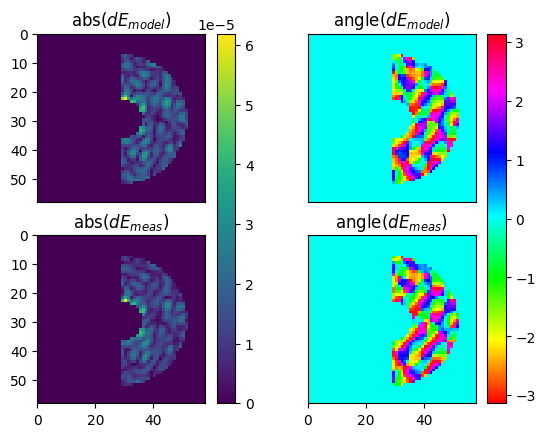

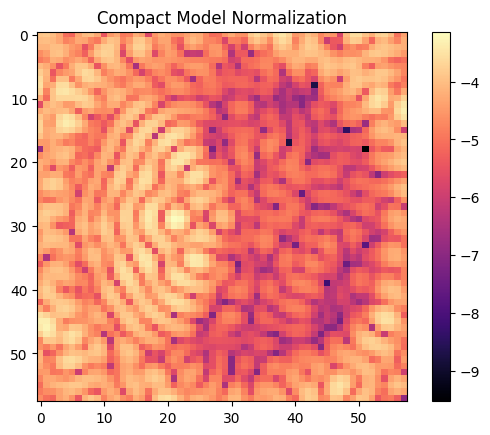

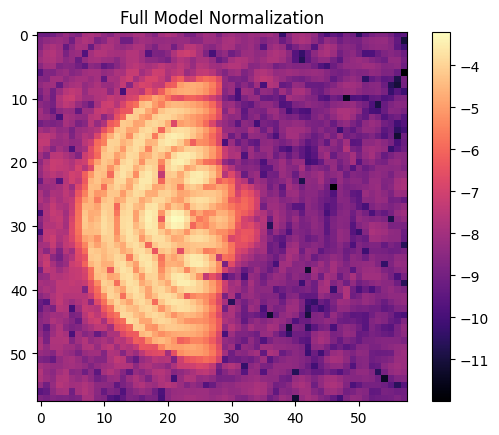

Core throughput within the half-max isophote(s) = 7.29% 	at separation = (-7.0, 0.0) lambda0/D.
[Getting updated summed image]	Elapsed: 17.659618377685547


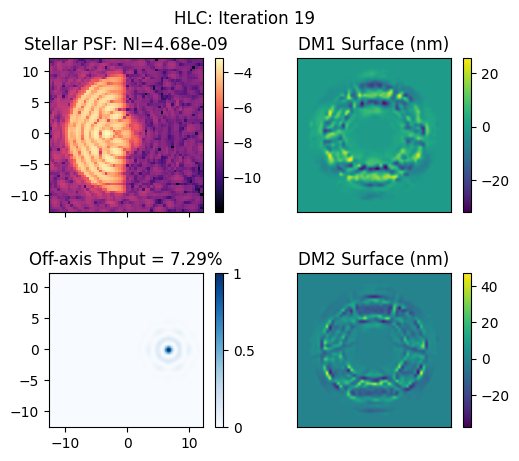

Complex projection of deltaE is 0.82    for subband 0/0
Complex correlation of deltaE is 0.98    for subband 0/0
Using the Jacobian to make other matrices...done.
Control beginning ...
Scaling factor:		0.50		0.50		0.50		0.50		0.50		0.50		0.50		0.50		
log10reg:    		-6.0		-5.5		-5.0		-4.5		-4.0		-3.5		-3.0		-2.5		
Inorm:       		1.62e-07	7.41e-08	3.50e-08	1.63e-08	7.21e-09	4.60e-09	4.22e-09	4.22e-09	
Model-based grid search expects log10reg, = -3.0,	 dmfac = 0.50,	 4.22e-09 normalized intensity.
 DM1 P-V in volts: 50.249
 DM2 P-V in volts: 86.978
RMS surface of DM1 = 6.9 nm
RMS surface of DM2 = 8.5 nm
Previous Measured NI:			 4.68e-09 
Saving data snippet to:
	/home/u21/kianmilani/Documents/falco-python/data/brief/hlc_575_test_snippet.pkl  ...done.

Core throughput within the half-max isophote(s) = 7.29% 	at separation = (-7.0, 0.0) lambda0/D.

Saving data snippet to:
	/home/u21/kianmilani/Documents/falco-python/data/brief/hlc_575_test_snippet.pkl...done.

Entire workspace NOT saved bec

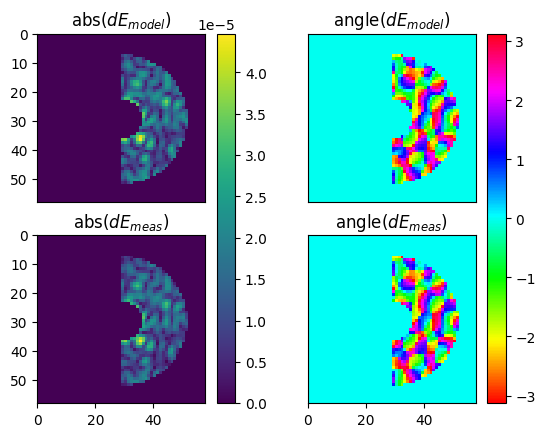

In [8]:
falco.wfsc.loop(mp, out)
misc.save_pickle('results/' + mp.runLabel + f'_mp_{date}.pkl', mp)
misc.save_pickle('results/' + mp.runLabel + f'_out_{date}.pkl', out)

In [27]:
mp.full.final_sampling_lam0, 0.43478260869565216

(0.4347826086956521, 0.43478260869565216)

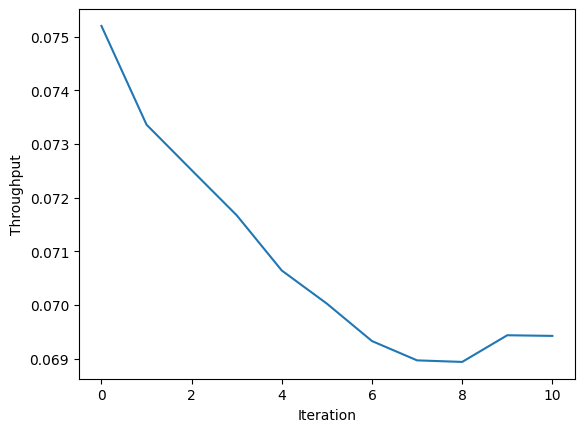

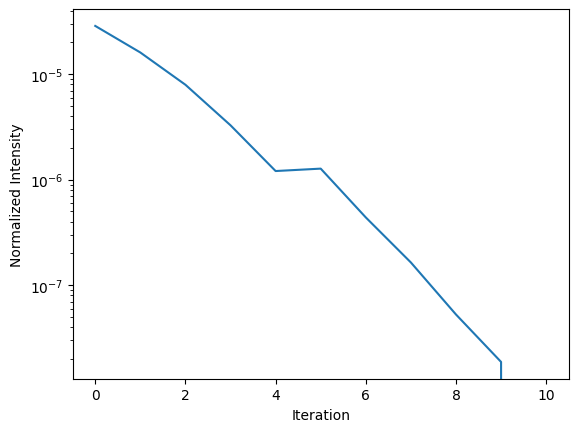

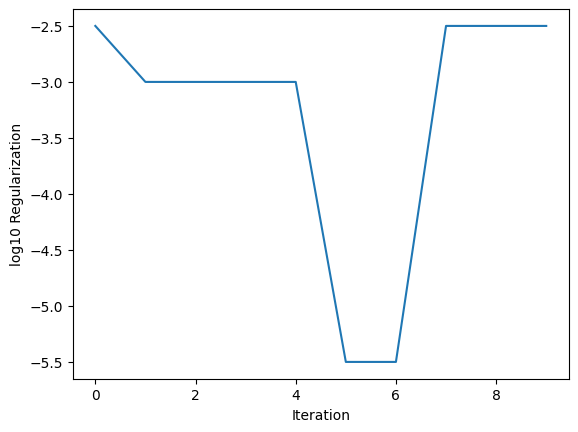

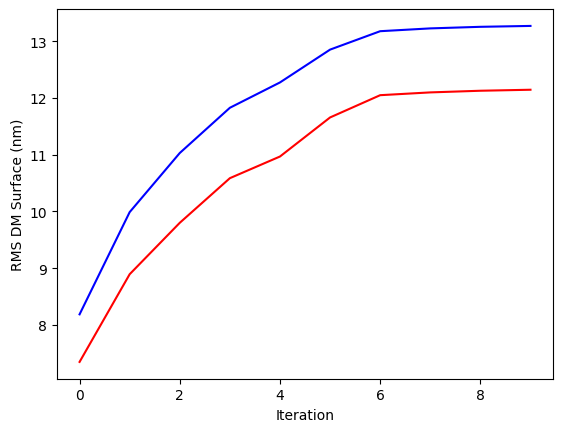

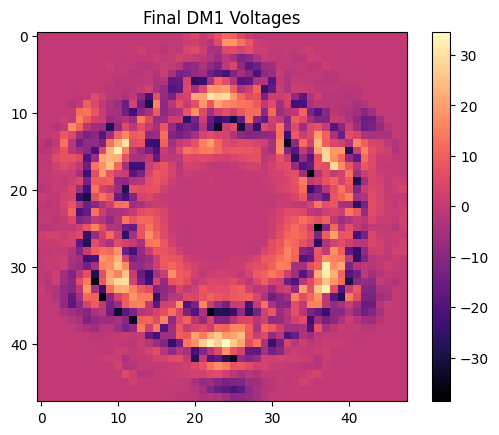

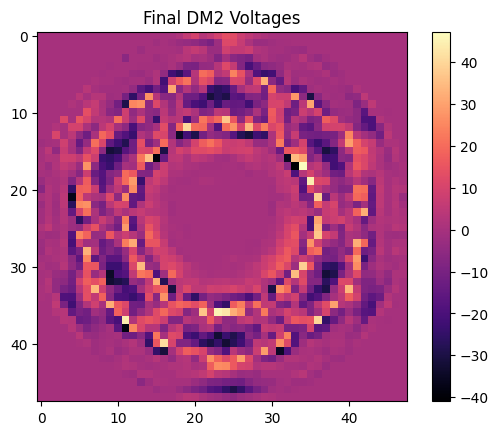

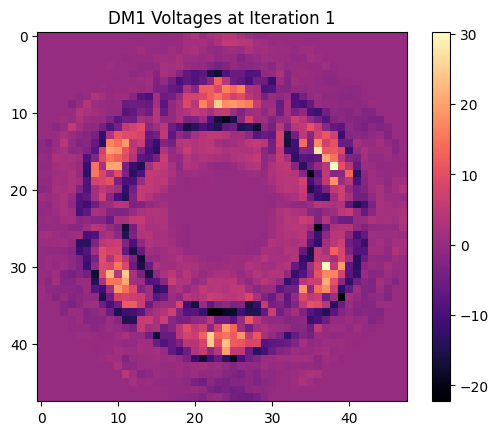

In [20]:
falco.plot.plot_trial_output(out)